# Natural Langauage Processing
The purpose of this notebook is to familiarize myself with concepts and common techniques in NLP:
- nltk module
- Tokenizing
- Removing Stop words
- Stemming
- Part of Speech Tagging
- Chunking and Chinking
- Named Entity Recognition
- Movie review classification

##### Appendix:
- More on Regular Expression

# Natural Language Toolkit (nltk) module
This is a well-known module that aids the handling of human language data. It contains functions to perform tasks such as tokenizing, stemming, tagging, and chunking.

Part of a useful 

In [86]:
import nltk

In [51]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Tokenization

In [87]:
from nltk.tokenize import sent_tokenize, word_tokenize
text = 'Hi, my name is inigo montoya. You killed my father. Prepare to die.'
# setense tokenization
sent_tok = sent_tokenize(text)
print('Tokenize sentences: ', sent_tok)
# word tokenization
word_tok = word_tokenize(sent_tok[0])
print('Tokenize words: ', word_tok)

Tokenize sentences:  ['Hi, my name is inigo montoya.', 'You killed my father.', 'Prepare to die.']
Tokenize words:  ['Hi', ',', 'my', 'name', 'is', 'inigo', 'montoya', '.']


# Removing Stop Words

In [88]:
from nltk.corpus import stopwords
sentence = 'In computing, stop words are words which are filtered out before or after processing of natural language data.'
non_stop = [w for w in word_tokenize(sentence) if not w in set(stopwords.words('english'))]
non_stop

['In',
 'computing',
 ',',
 'stop',
 'words',
 'words',
 'filtered',
 'processing',
 'natural',
 'language',
 'data',
 '.']

# Stemming

In [75]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
example_words = ['eat','ate','eaten','eating','eats']
[ps.stem(w) for w in example_words]

['eat', 'ate', 'eaten', 'eat', 'eat']

In [76]:
text = 'Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.'
word_tok = word_tokenize(text)
[ps.stem(w) for w in word_tok]

['stem',
 'is',
 'the',
 'process',
 'of',
 'reduc',
 'a',
 'word',
 'to',
 'it',
 'word',
 'stem',
 'that',
 'affix',
 'to',
 'suffix',
 'and',
 'prefix',
 'or',
 'to',
 'the',
 'root',
 'of',
 'word',
 'known',
 'as',
 'a',
 'lemma',
 '.']

# Part of Speech Tagging
Before going into the tagging part, we can customize our sentence tokenizer so that it will perform better on our sample text. The algorithm to do this is the Punkt Sentence Tokenizer. Unlabeled text can be used to train the algorithm on splitting text into sentences (sentence tokenization). 

In [89]:
from nltk.corpus import udhr
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
train_text = state_union.raw('2005-GWBush.txt')
test_text = state_union.raw('2006-GWBush.txt')


In [90]:
# Punkt Sentence Tokenizer is an unsuervised learning algorithm that can learn 
# how to tokenize sentences (splitting a volume of text into sentences) using unlabeled text.
punk = PunktSentenceTokenizer(train_text)

In [91]:
# Testing our tokenizer
test_tok = punk.tokenize(test_text)

Now the text of interest is tokenized by sentence, we can perform part of speech tagging.

In [92]:
# for each sentence token, tokenize the words. Then, tag each word the the part of speech
from nltk import pos_tag
tagged = []
for sent in test_tok:
    words = word_tokenize(sent)
    tagged.append(pos_tag(words))
tagged[0]

[('PRESIDENT', 'NNP'),
 ('GEORGE', 'NNP'),
 ('W.', 'NNP'),
 ('BUSH', 'NNP'),
 ("'S", 'POS'),
 ('ADDRESS', 'NNP'),
 ('BEFORE', 'IN'),
 ('A', 'NNP'),
 ('JOINT', 'NNP'),
 ('SESSION', 'NNP'),
 ('OF', 'IN'),
 ('THE', 'NNP'),
 ('CONGRESS', 'NNP'),
 ('ON', 'NNP'),
 ('THE', 'NNP'),
 ('STATE', 'NNP'),
 ('OF', 'IN'),
 ('THE', 'NNP'),
 ('UNION', 'NNP'),
 ('January', 'NNP'),
 ('31', 'CD'),
 (',', ','),
 ('2006', 'CD'),
 ('THE', 'NNP'),
 ('PRESIDENT', 'NNP'),
 (':', ':'),
 ('Thank', 'NNP'),
 ('you', 'PRP'),
 ('all', 'DT'),
 ('.', '.')]

# Chunking
Chunking is to group words with nouns and their corresponding verbs, adjectives, or adverbs. To do so, we will use regular expression to find words groups.

In [ ]:
# regular expression code
'''
+ = match 1 or more
? = match 0 or 1 repetitions.
* = match 0 or MORE repetitions
. = Any character except a new line
'''

In [93]:
def print_chunks(chunked):
    for sub in chunked.subtrees():
        if sub.label() == 'Chunk':
            print(sub)

In [116]:
# defining the grammars of each chunk
# RB --> adverb (0 or more; any tense)
# VB --> verb (0 or more; any tense)
# NNP --> proper noun (1 or more)
# NN --> noun (0 or 1)
chunkGram = r'Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}'
chunkParser = nltk.RegexpParser(chunkGram)
chunked = chunkParser.parse(tagged[1])
print_chunks(chunked)

(Chunk Mr./NNP Speaker/NNP)
(Chunk Vice/NNP President/NNP Cheney/NNP)
(Chunk Congress/NNP)
(Chunk Supreme/NNP Court/NNP)
(Chunk called/VBD America/NNP)


# Chinking
A more complex form of chunking. When the syntax is given, it removes any groups of words from the chunks

In [138]:
# Comparing with or without chinking
#chunk every word
chunkGram1 = r'Chunk: {<.*>+}'
#chunk every word, then split the chunk by specific POS (VB,IN,DT,TO)
chunkGram2 = r'''Chunk: {<.*>+}
                        }<VB.?|IN|DT|TO>+{'''
chunkParser1 = nltk.RegexpParser(chunkGram1)
chunkParser2 = nltk.RegexpParser(chunkGram2)
chunked1 = chunkParser1.parse(tagged[1])
chunked2 = chunkParser2.parse(tagged[1])
print_chunks(chunked1)
print('###############')
print_chunks(chunked2)
chunked1.draw()

(Chunk
  Mr./NNP
  Speaker/NNP
  ,/,
  Vice/NNP
  President/NNP
  Cheney/NNP
  ,/,
  members/NNS
  of/IN
  Congress/NNP
  ,/,
  members/NNS
  of/IN
  the/DT
  Supreme/NNP
  Court/NNP
  and/CC
  diplomatic/JJ
  corps/NN
  ,/,
  distinguished/JJ
  guests/NNS
  ,/,
  and/CC
  fellow/JJ
  citizens/NNS
  :/:
  Today/VB
  our/PRP$
  nation/NN
  lost/VBD
  a/DT
  beloved/VBN
  ,/,
  graceful/JJ
  ,/,
  courageous/JJ
  woman/NN
  who/WP
  called/VBD
  America/NNP
  to/TO
  its/PRP$
  founding/NN
  ideals/NNS
  and/CC
  carried/VBD
  on/IN
  a/DT
  noble/JJ
  dream/NN
  ./.)
###############
(Chunk
  Mr./NNP
  Speaker/NNP
  ,/,
  Vice/NNP
  President/NNP
  Cheney/NNP
  ,/,
  members/NNS)
(Chunk Congress/NNP ,/, members/NNS)
(Chunk
  Supreme/NNP
  Court/NNP
  and/CC
  diplomatic/JJ
  corps/NN
  ,/,
  distinguished/JJ
  guests/NNS
  ,/,
  and/CC
  fellow/JJ
  citizens/NNS
  :/:)
(Chunk our/PRP$ nation/NN)
(Chunk ,/, graceful/JJ ,/, courageous/JJ woman/NN who/WP)
(Chunk America/NNP)
(Chunk its/PRP$

# Name Entity Recognition

In [140]:
# Name entity recognition is used to extract from unstructured text the
# categories of entities such as person, organization, location, etc.
from nltk import ne_chunk
namedEnt_list = []
# tagged is a list of tagged part of speech of words in a sentence
for each_tag in tagged:
    namedEnt_list.append(ne_chunk(each_tag, binary=False))
namedEnt_list[0].draw()

# Machine Learning: Movie review classification

In [194]:
import random
import pandas as pd
from nltk.corpus import movie_reviews
pos_ids = movie_reviews.fileids('pos') #this returns the file ids of all positive reviews
# put them into a dataframe
df_pos = pd.DataFrame()
df_pos['id'] = pos_ids
df_pos['label'] = [1]*len(pos_ids)
# Same here for negative reviews
neg_ids = movie_reviews.fileids('neg')
df_neg = pd.DataFrame()
df_neg['id'] = neg_ids
df_neg['label'] = [0]*len(neg_ids)
# concatenate the two dataframes. axis 0 means to append below
data = pd.concat([df_pos,df_neg],ignore_index=True,axis=0)
# obtain reviews using ids. Store in dataframe.
data['rev'] = [movie_reviews.words(id) for id in data['id']]
data

,id,label,rev
0,pos/cv000_29590.txt,1,"(films, adapted, from, comic, books, have, had..."
1,pos/cv001_18431.txt,1,"(every, now, and, then, a, movie, comes, along..."
2,pos/cv002_15918.txt,1,"(you, ', ve, got, mail, works, alot, better, t..."
3,pos/cv003_11664.txt,1,"("", jaws, "", is, a, rare, film, that, grabs, y..."
4,pos/cv004_11636.txt,1,"(moviemaking, is, a, lot, like, being, the, ge..."
5,pos/cv005_29443.txt,1,"(on, june, 30, ,, 1960, ,, a, self, -, taught,..."
6,pos/cv006_15448.txt,1,"(apparently, ,, director, tony, kaye, had, a, ..."
7,pos/cv007_4968.txt,1,"(one, of, my, colleagues, was, surprised, when..."
8,pos/cv008_29435.txt,1,"(after, bloody, clashes, and, independence, wo..."
9,pos/cv009_29592.txt,1,"(the, american, action, film, has, been, slowl..."


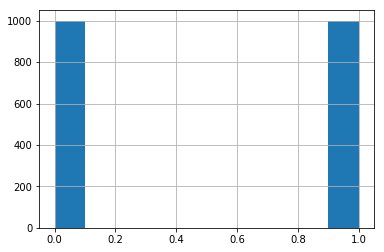

In [269]:
# randomly shuffle the dataset
data = data.sample(frac=1)
# plot the labels to inspect distribution
# looks like the data is very balanced.
import matplotlib.pyplot as plt
%matplotlib inline
data['label'].hist()

In [216]:
# Some data exploration
this_rev = data.iloc[0]
rev_words = [w.lower() for w in this_rev['rev']]
freq_dist = nltk.FreqDist(rev_words)
freq_dist['good']

2

In [246]:
# putting all words into a list
all_words = nltk.FreqDist([w for w in movie_reviews.words()])

In [247]:
import numpy as np
# use the 4000 most frequent words as freatures
common_words = list(all_words.keys())[:4000]
# find_features searches for words in common_words that are present in each review
def find_features(common_words,review):
    # common_words is a list
    # review is a list of words
    review = [w.lower() for w in review]
    return np.array([w in set(review) for w in common_words]).astype(int)
find_features(common_words,data['rev'][0])

array([0, 1, 0, ..., 0, 0, 0])

In [248]:
# Generate features matrix
X_raw = np.array([find_features(common_words,review) for review in data['rev']])
X_raw

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [249]:
# shape of the feature matrix
X_raw.shape

(2000, 4000)

In [252]:
# Machine Learning! Split the dataset into training and testing
# Use a support vector machine algorithm to classify
# score the model performance
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X_raw,data['label'])
model = SVC(kernel='linear')
model.fit(X_train,y_train)
print(classification_report(model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       242
           1       0.85      0.83      0.84       258

   micro avg       0.84      0.84      0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



In [273]:
# print out accuracy scores
from sklearn.metrics import accuracy_score
print('Testing accuracy:')
print(accuracy_score(model.predict(X_test),y_test))
print('Training accuracy:')
print(accuracy_score(model.predict(X_train),y_train))

Testing accuracy:
0.836
Training accuracy:
1.0


### Testing on real data

In [263]:
# A negative the hobbits review
# Printing out the review
hobbits = open(r'C:\Users\Chris\Documents\Data-Science-Projects\Dataset\The Hobbits review.txt','r').read()
print(hobbits)
hobbits = hobbits.split()

Like a lot of people, I loved Peter Jackson's original Lord of the Rings trilogy (although we can all admit Return of the King didn't quite know when to leave the party). So I was pretty surprised when Jackson took over from Guillermo del Toro to make the Hobbit trilogy, and the first film turned out to be such a boring mess. Even more so when The Desolation of Smaug rolled around, and the problems somehow seemed to get even worse. In what can only be described as the most honest promotional video of all time, we find out why: the movies were made completely on the fly, without a script or nearly any advanced planning. The above clip is from a behind-the-scenes video on the Battle of the Five Armies Blu-ray, and it features Peter Jackson, Andy Serkis, and other production personnel confessing that due to the director changeover â€” del Toro left the project after nearly two years of pre-production â€” Jackson hit the ground running but was never able to hit the reset button to get time

In [265]:
# predicting if it is a positive or negative review
# 0 means negative
X_hobbits = find_features(common_words,hobbits)
model.predict([X_hobbits])

array([0], dtype=int64)

In [266]:
# A positive review on black panther
# printing the review
panther = open(r'C:\Users\Chris\Documents\Data-Science-Projects\Dataset\Black panther.txt','r').read()
print(panther)
panther = panther.split()
X_panther = find_features(common_words,panther)
# prediction is 1. That means the model predicted positive
model.predict([X_panther])

Ryan Coogler's masterful superhero drama is unlike any other, featuring outstanding acting, breathtaking art direction, fascinating royal intrigue, memorable action sequences, and surprising depth. It's that depth -- of character, of storyline, of relevancy -- that makes Black Panther shine, as Boseman's T'Challa takes the mantle of king with enormous uncertainty about whether to share Wakanda's resources with the world. With the exception of his second-in-command W'Kabi (Kaluuya), T'Challa surrounds himself with an inner circle of influential women: Okoye, Nakia, his mother (Bassett), and his genius younger sister, scientist/tech inventor Shuri (Letitia Wright). Each of them contributes much to the story, with Gurira's spear-wielding Okoye the movie's clear scene-stealer, Wright the clever comic relief, and Nyong'o offering a wee bit of romance. Even the central villain, as played by frequent Coogler collaborator Jordan, is well-rounded and humanized, with the actor doing great work o

array([1], dtype=int64)

# Appendix: More on regular expression

### The '^' operator identifies the words starting with characters specified

In [60]:
import re
text = state_union.raw('2005-GWBush.txt')
print('Words starting with s: ',[w for w in word_tokenize(text) if re.search('^s',w)][0:5])
print('Words starting with th: ',[w for w in word_tokenize(text) if re.search('^th',w)][0:5])

Words starting with s:  ['share', 'serve', 'share', 'sovereign', 'stood']
Words starting with th:  ['the', 'the', 'the', 'that', 'the']


### The '$' operator identifies the words ending with characters specified

In [61]:
print('Words ending with s: ',[w for w in word_tokenize(text) if re.search('s$',w)][0:5])

Words ending with s:  ['members', 'Congress', 'citizens', 'As', 'Congress']


### The '+' operator means one or more repeating sequence

In [62]:
words = [w for w in word_tokenize(text) if re.search('e+$',w)]
print('Words ending with one or more ''e'': ',words[0:3]+[w for w in words if re.search('ee$',w)][0:3])

Words ending with one or more e:  ['Vice', 'the', 'share', 'free', 'see', 'free']


### The '*' operator means zero or more repeating sequence

In [63]:
print('Words ending with zero or more e: ',[w for w in word_tokenize(text) if re.search('e*$',w)][0:5])

Words ending with zero or more e:  ['PRESIDENT', 'GEORGE', 'W.', 'BUSH', "'S"]


### '<>' specifies a token. And <.*> accepts everything.

In [82]:
# <.*> accepts everything
from nltk import TokenSearcher
searcher = nltk.TokenSearcher(word_tokenize(text))
searcher.findall(r'<more><.*>')[0:5]

[['more', 'Americans'],
 ['more', 'flexible'],
 ['more', 'innovative'],
 ['more', 'competitive'],
 ['more', 'than']]

In [93]:
searcher.findall(r'<RB.?>')

[]

#### You can find phrases containing sequences of characters

In [81]:
searcher.findall(r'<.*ing><.*>')[0:5]

[['guiding', 'ideal'],
 ['evening', 'I'],
 ['growing', 'economy'],
 ['going', 'back'],
 ['moving', 'into']]

This notebook is done following a tutorial by a class in Eduonix.
The class can be found at https://www.eduonix.com/dashboard/learn-machine-learning-by-building-projects

# References
- https://www.nltk.org/
- https://www.eduonix.com/dashboard/learn-machine-learning-by-building-projects
- https://python.gotrained.com/nltk-regex/
- https://en.wikipedia.org/wiki/Named-entity_recognition